In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_train = pd.read_csv("carInsurance_train.csv")

df_test = pd.read_csv("carInsurance_test.csv")

In [4]:
df_train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


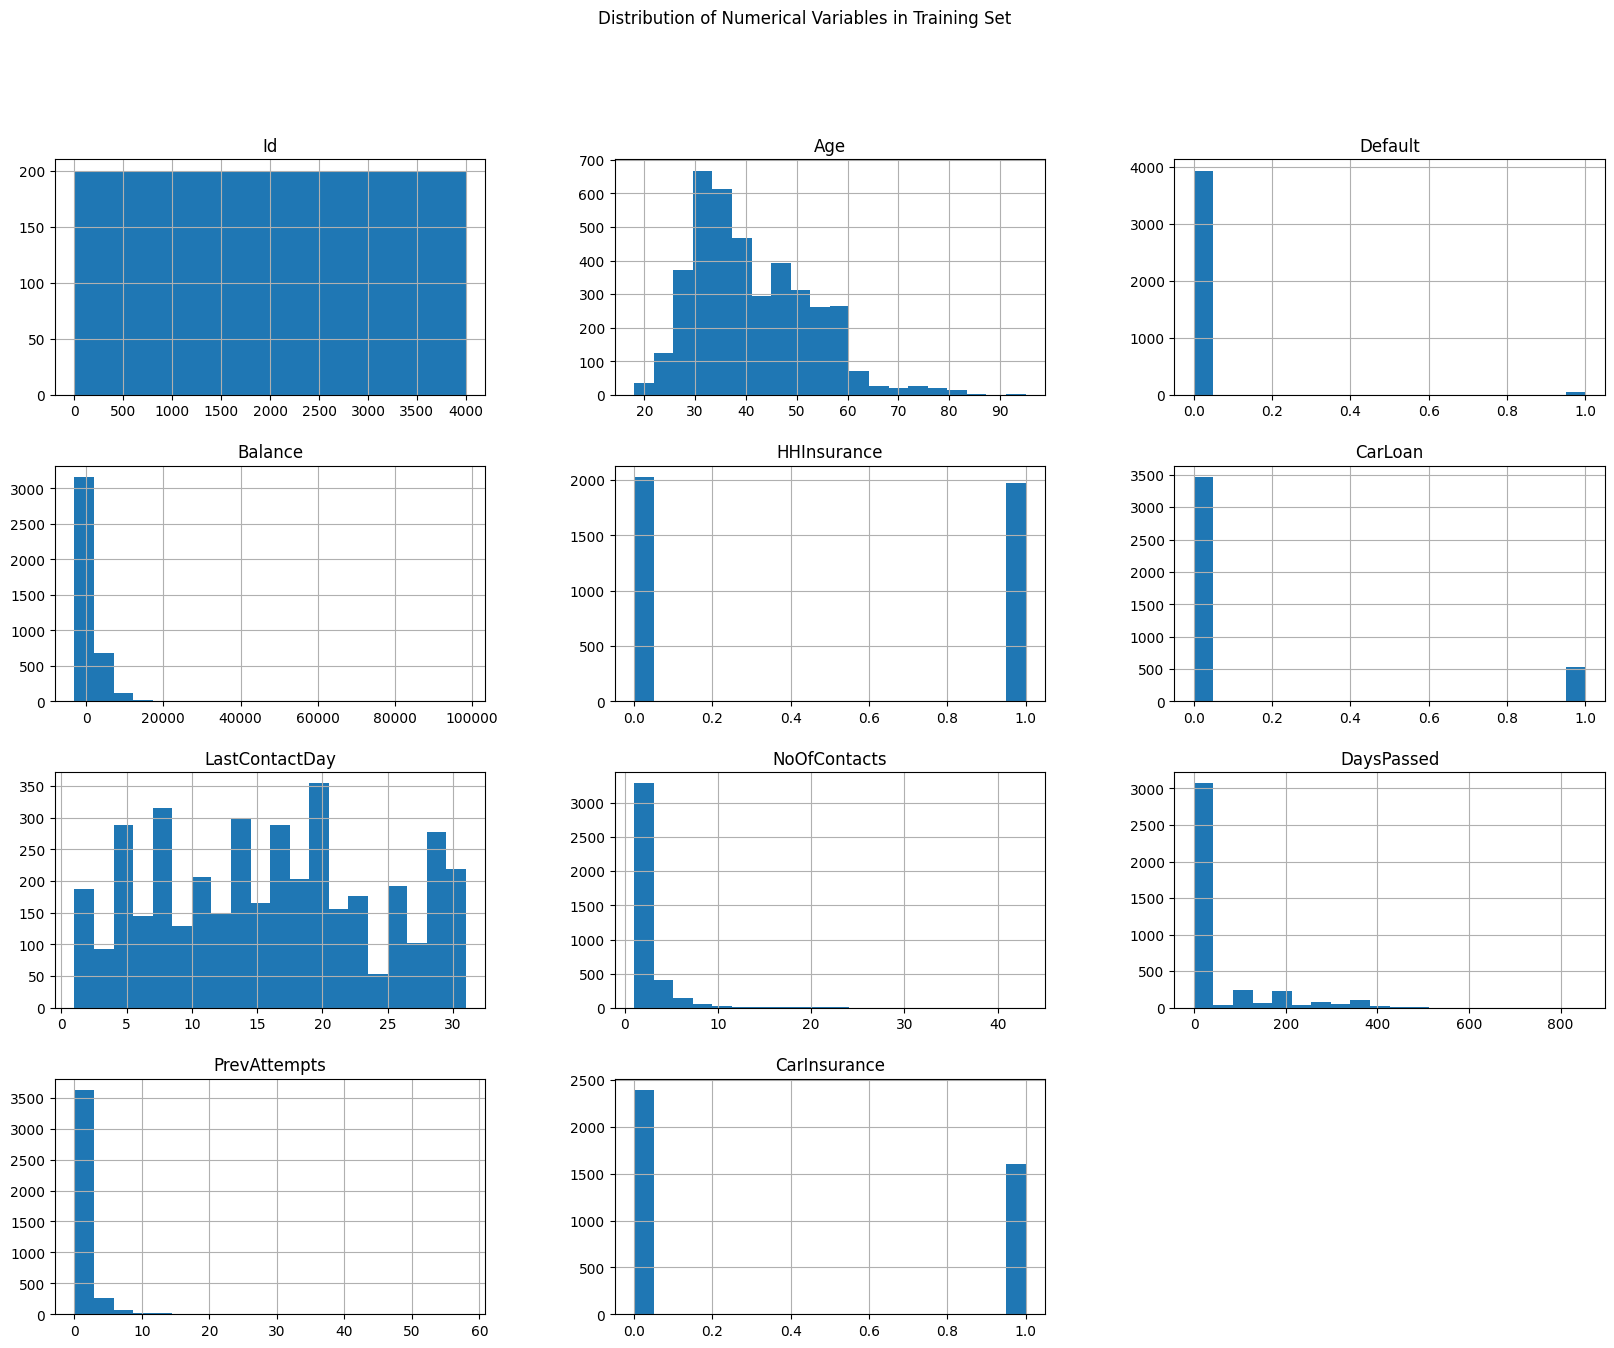

In [5]:
df_train.hist(figsize=(20, 15), bins=20)
plt.suptitle('Distribution of Numerical Variables in Training Set')
plt.show()



In [6]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = detect_outliers(df_train, 'Balance')

outliers['Balance'].min

<bound method Series.min of 17       7331
21       8304
31       6981
40       3935
52       4420
        ...  
3953    10250
3961     7154
3967     4780
3975     4229
3982     4930
Name: Balance, Length: 383, dtype: int64>

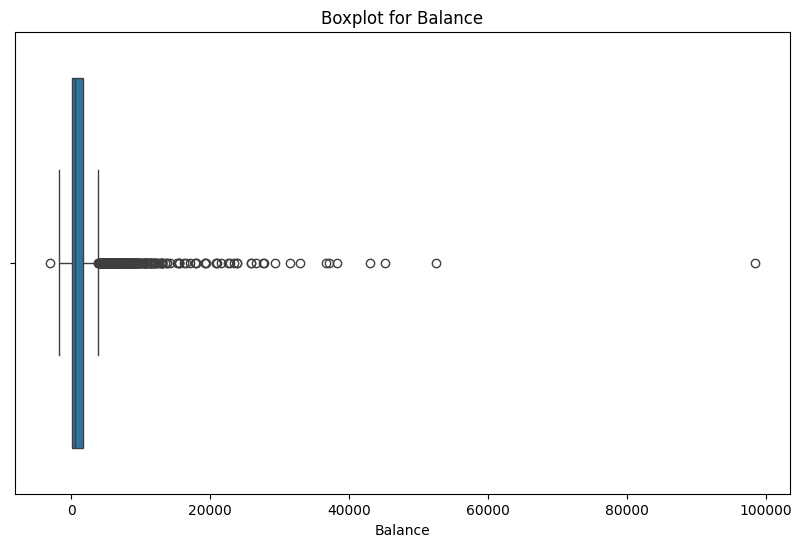

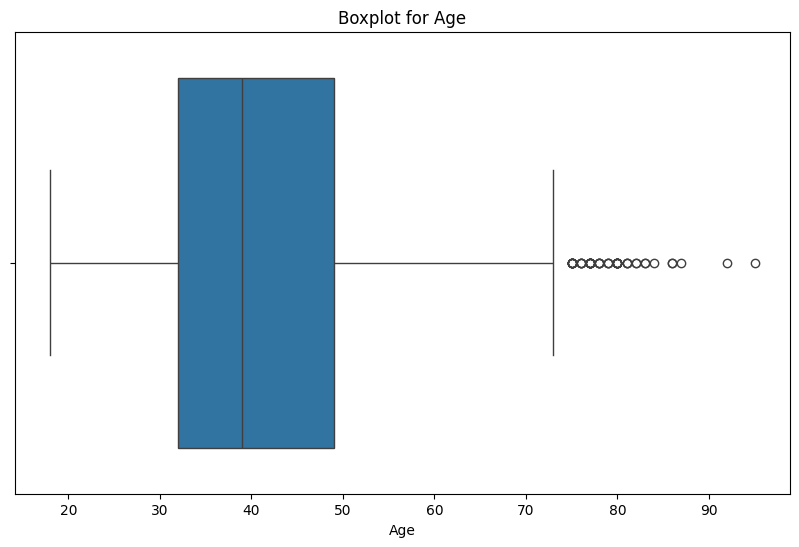

In [7]:
# Define the numerical columns
numerical_columns = ['Balance', 'Age'] 

# Create a boxplot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))  
    sns.boxplot(x=df_train[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


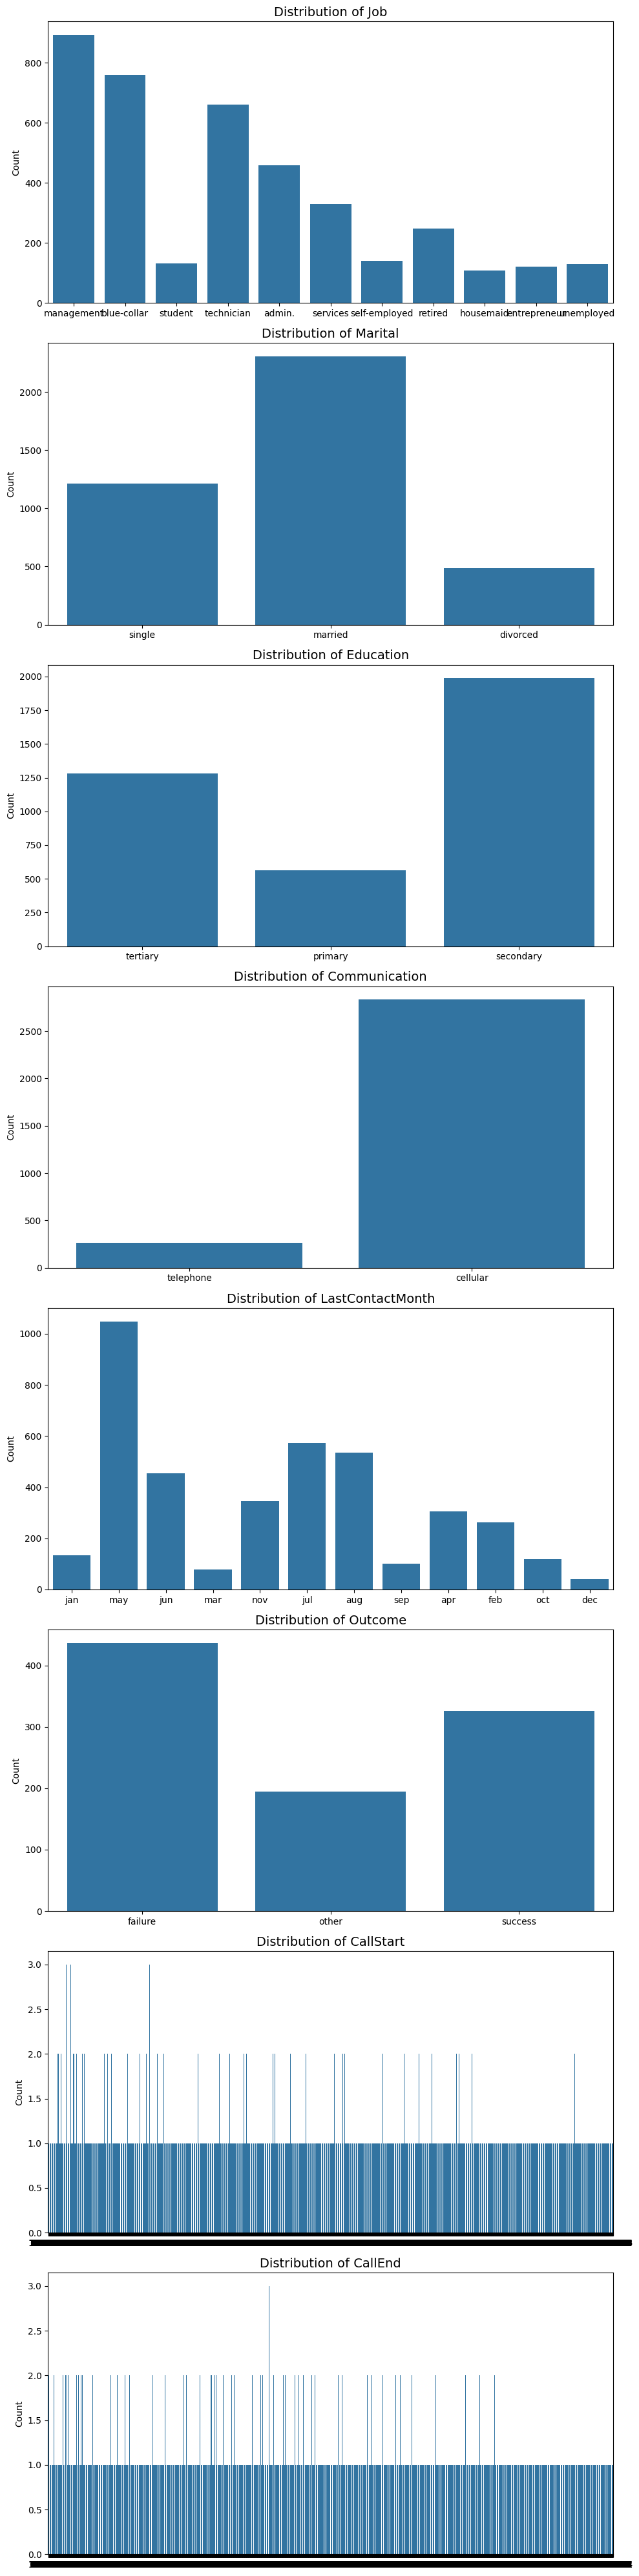

In [8]:
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
# Plotting bar charts for each categorical feature
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5*len(categorical_columns)))
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df_train, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

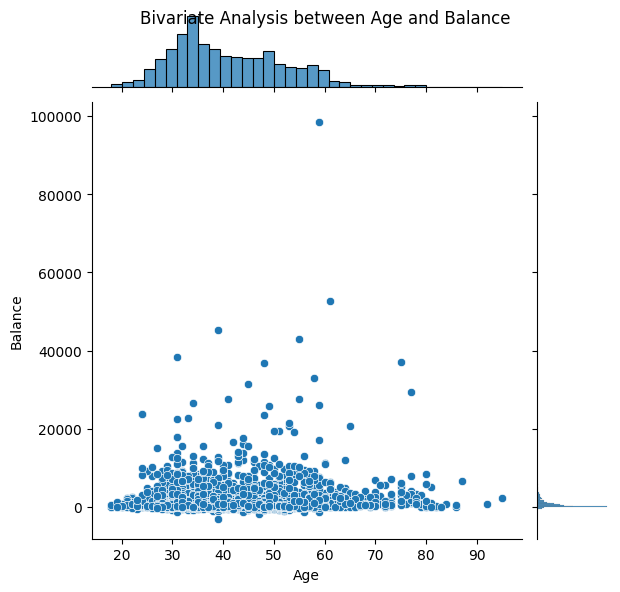

In [9]:
sns.jointplot(x='Age', y='Balance', data=df_train, kind='scatter')
plt.suptitle('Bivariate Analysis between Age and Balance')
plt.show()

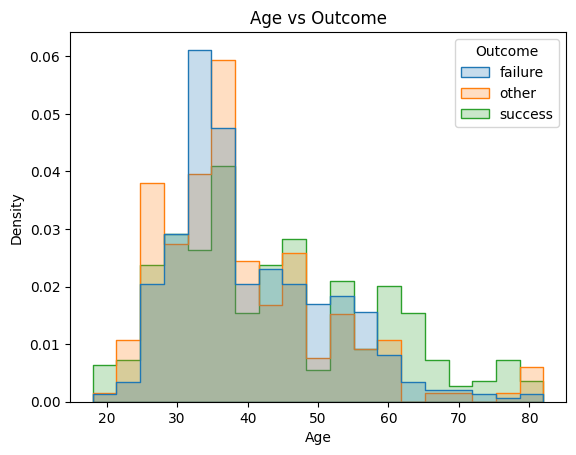

In [10]:
sns.histplot(data=df_train, x='Age', hue='Outcome', element='step', stat="density", common_norm=False)
plt.title('Age vs Outcome')
plt.show()


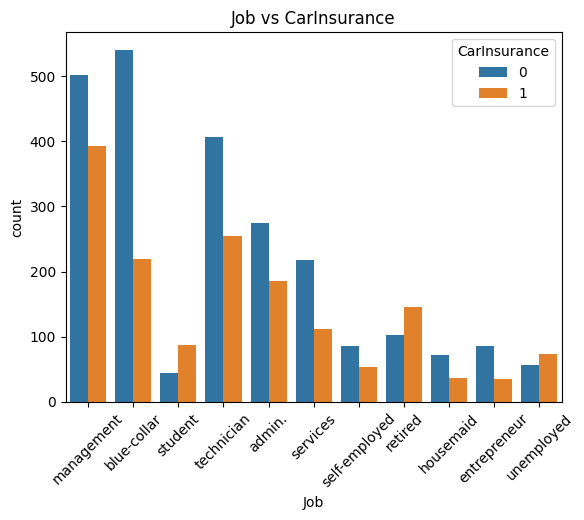

In [11]:
sns.countplot(data=df_train, x='Job', hue='CarInsurance')
plt.title('Job vs CarInsurance')
plt.xticks(rotation=45)
plt.show()


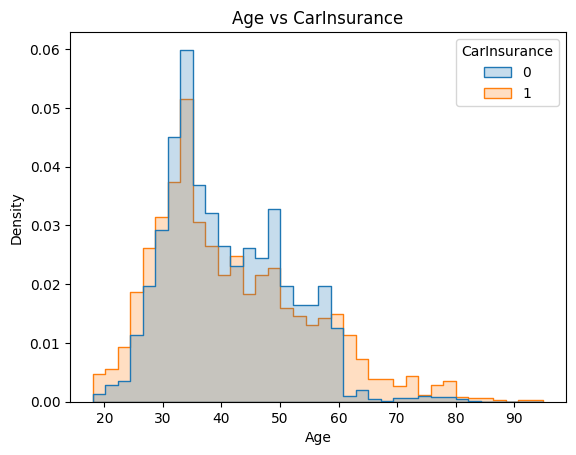

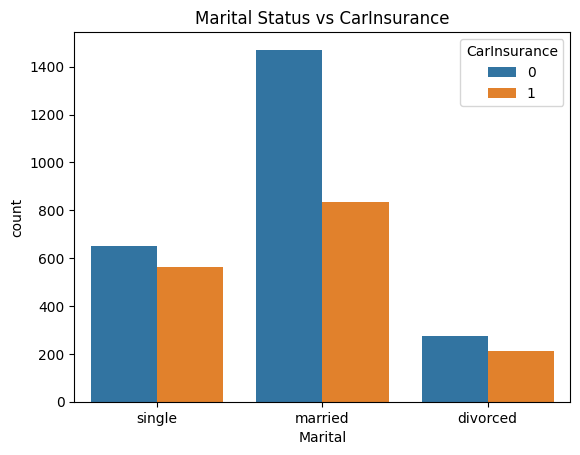

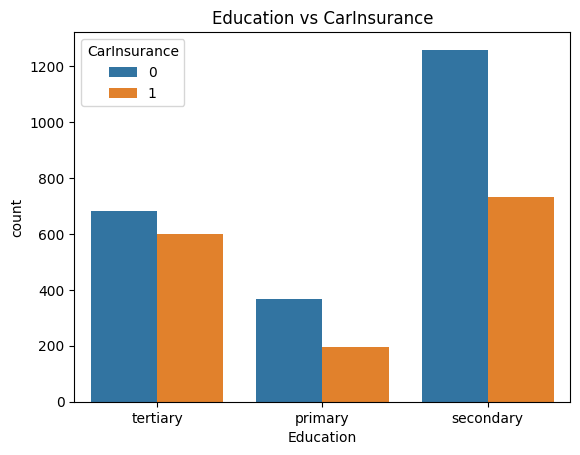

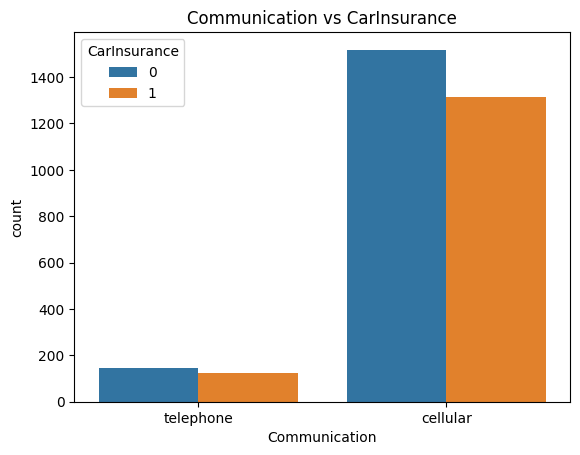

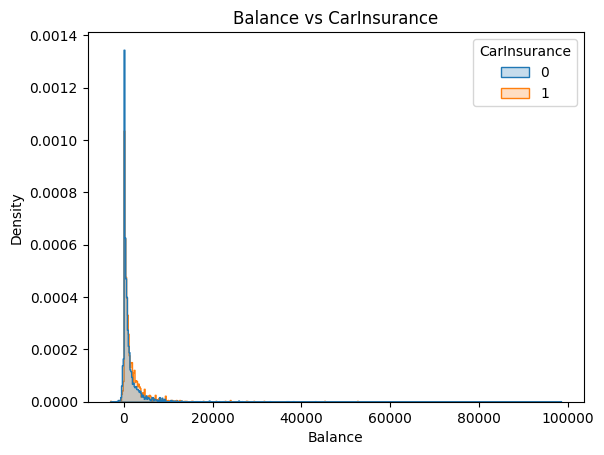

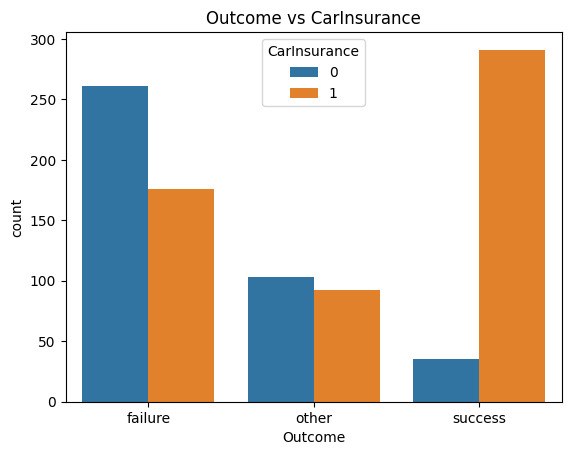

In [12]:
sns.histplot(data=df_train, x='Age', hue='CarInsurance', element='step', stat="density", common_norm=False)
plt.title('Age vs CarInsurance')
plt.show()

sns.countplot(data=df_train, x='Marital', hue='CarInsurance')
plt.title('Marital Status vs CarInsurance')
plt.show()

sns.countplot(data=df_train, x='Education', hue='CarInsurance')
plt.title('Education vs CarInsurance')
plt.show()

sns.countplot(data=df_train, x='Communication', hue='CarInsurance')
plt.title('Communication vs CarInsurance')
plt.show()

sns.histplot(data=df_train, x='Balance', hue='CarInsurance', element='step', stat="density", common_norm=False)
plt.title('Balance vs CarInsurance')
plt.show()


sns.countplot(data=df_train, x='Outcome', hue='CarInsurance')
plt.title('Outcome vs CarInsurance')
plt.show()


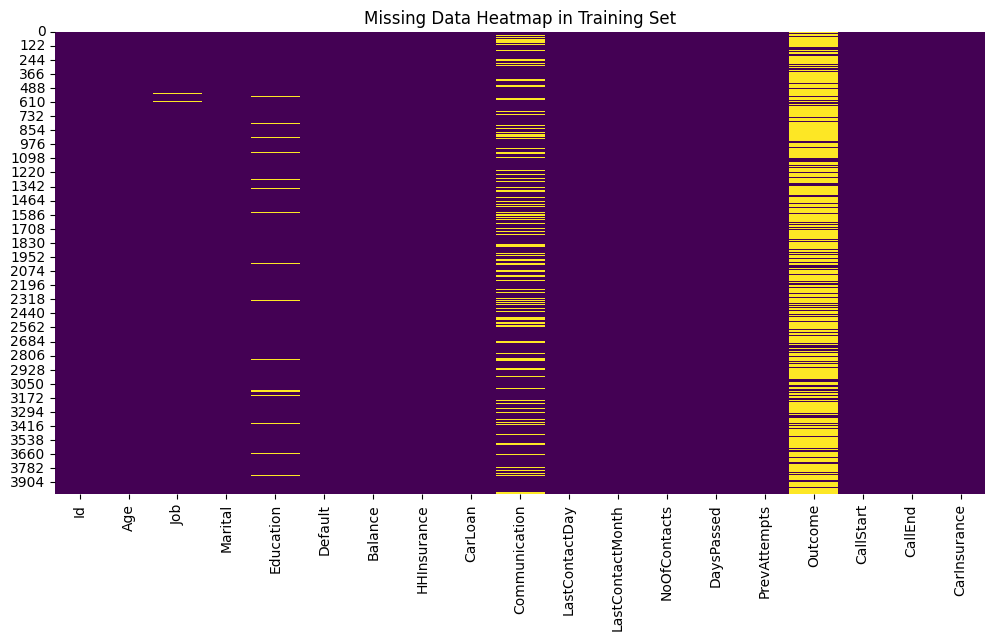

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap in Training Set')
plt.show()

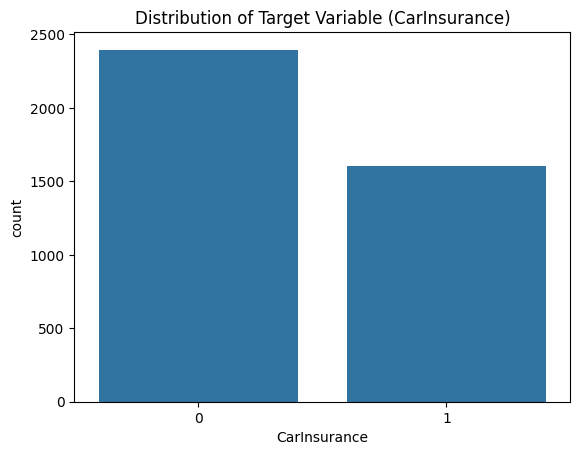

In [14]:
sns.countplot(x='CarInsurance', data=df_train)
plt.title('Distribution of Target Variable (CarInsurance)')
plt.show()

In [15]:
# Check the data types of each column
print("\nData Types:")
print(df_train.dtypes)

# Check basic statistics of numeric columns
print("\nDescriptive Statistics:")
print(df_train.describe())

# Check for missing values in the DataFrame
print("\nMissing Values:")
print(df_train.isnull().sum())



Data Types:
Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

Descriptive Statistics:
                Id          Age      Default       Balance  HHInsurance  \
count  4000.000000  4000.000000  4000.000000   4000.000000   4000.00000   
mean   2000.500000    41.214750     0.014500   1532.937250      0.49275   
std    1154.844867    11.550194     0.119555   3511.452489      0.50001   
min       1.000000    18.000000     0.000000  -3058.000000      0.00000   
25%    1000.750000    32.000000     0.000000    111.000000  

In [16]:
print("\nUnique Values in outcome Column:")
print(df_train['Outcome'].unique())
print("\nUnique Values in Communication Column:")
print(df_train['Communication'].unique())
print("\nUnique Values in Education Column:")
print(df_train['Education'].unique())
print("\nUnique Values in Job Column:")
print(df_train['Job'].unique())
print("\nUnique Values in Age Column:")
print(df_train['Age'].unique())


Unique Values in outcome Column:
[nan 'failure' 'other' 'success']

Unique Values in Communication Column:
['telephone' nan 'cellular']

Unique Values in Education Column:
['tertiary' 'primary' 'secondary' nan]

Unique Values in Job Column:
['management' 'blue-collar' 'student' 'technician' 'admin.' 'services'
 'self-employed' 'retired' nan 'housemaid' 'entrepreneur' 'unemployed']

Unique Values in Age Column:
[32 29 25 30 37 35 27 53 44 38 61 34 46 49 50 57 80 31 63 60 54 45 42 36
 39 33 41 40 79 47 78 52 18 28 58 23 55 56 43 48 19 62 64 24 73 26 51 59
 66 20 77 71 69 72 68 65 22 67 70 75 21 87 83 82 84 81 76 92 86 95]


In [17]:
duplicate_rows = df_train[df_train.duplicated()]
duplicate_rows

num_duplicate_rows = duplicate_rows.shape[0]
num_duplicate_rows

0

In [18]:
null_Education_rows = df_train[df_train['Education'].isnull()]
print("Rows with null Job:")
null_Education_rows

Rows with null Job:


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
14,15,25,services,single,NaN,0,2022,0,0,cellular,29,jul,8,97,12,other,14:15:09,14:19:45,1
27,28,45,NaN,divorced,NaN,0,0,0,0,cellular,21,apr,3,-1,0,NaN,12:33:22,12:38:00,1
50,51,54,services,divorced,NaN,0,0,1,0,cellular,16,apr,1,-1,0,NaN,16:18:17,16:22:40,0
53,54,78,retired,married,NaN,0,3208,0,0,telephone,20,may,3,-1,0,NaN,16:00:27,16:06:18,1
58,59,34,management,single,NaN,0,6013,1,0,cellular,18,may,1,-1,0,NaN,13:52:00,14:02:12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890,3891,42,unemployed,married,NaN,0,970,1,0,telephone,21,jul,10,-1,0,NaN,12:12:05,12:23:36,1
3908,3909,35,technician,single,NaN,0,0,0,0,cellular,28,jan,2,-1,0,NaN,12:01:54,12:03:15,0
3931,3932,36,student,single,NaN,0,417,0,0,cellular,10,feb,1,-1,0,NaN,14:49:17,14:51:48,1
3936,3937,36,blue-collar,married,NaN,0,79,1,0,NaN,19,may,14,-1,0,NaN,09:56:35,09:59:56,0


In [19]:
# Check the data types of each column
print("\nData Types:")
print(df_test.dtypes)

# Check basic statistics of numeric columns
print("\nDescriptive Statistics:")
print(df_test.describe())

# Check for missing values in the DataFrame
print("\nMissing Values:")
print(df_test.isnull().sum())


Data Types:
Id                    int64
Age                   int64
Job                  object
Marital              object
Education            object
Default               int64
Balance               int64
HHInsurance           int64
CarLoan               int64
Communication        object
LastContactDay        int64
LastContactMonth     object
NoOfContacts          int64
DaysPassed            int64
PrevAttempts          int64
Outcome              object
CallStart            object
CallEnd              object
CarInsurance        float64
dtype: object

Descriptive Statistics:
                Id          Age      Default       Balance  HHInsurance  \
count  1000.000000  1000.000000  1000.000000   1000.000000  1000.000000   
mean   4500.500000    41.473000     0.013000   1398.298000     0.513000   
std     288.819436    12.051577     0.113331   2660.408024     0.500081   
min    4001.000000    18.000000     0.000000  -1980.000000     0.000000   
25%    4250.750000    32.000000     0.000

In [20]:
print("\nUnique Values in outcome Column:")
print(df_test['Outcome'].unique())
print("\nUnique Values in Communication Column:")
print(df_test['Communication'].unique())
print("\nUnique Values in Education Column:")
print(df_test['Education'].unique())
print("\nUnique Values in Job Column:")
print(df_test['Job'].unique())


Unique Values in outcome Column:
[nan 'success' 'failure' 'other']

Unique Values in Communication Column:
[nan 'cellular' 'telephone']

Unique Values in Education Column:
['secondary' 'tertiary' 'primary' nan]

Unique Values in Job Column:
['admin.' 'management' 'services' 'technician' 'blue-collar'
 'self-employed' 'housemaid' 'retired' nan 'entrepreneur' 'unemployed'
 'student']


In [21]:
duplicate_rows = df_test[df_test.duplicated()]
duplicate_rows

num_duplicate_rows = duplicate_rows.shape[0]
num_duplicate_rows

0

In [22]:
null_outcome_and_negative_days = df_train[(df_train['Outcome'].isnull()) & (df_train['DaysPassed'] == -1)].shape[0]

print(f"Number of rows with null in 'Outcome' and -1 in 'DaysPassed': {null_outcome_and_negative_days}")

Number of rows with null in 'Outcome' and -1 in 'DaysPassed': 3042


In [23]:
null_outcome_and_negative_days = df_test[(df_test['Outcome'].isnull()) & (df_test['DaysPassed'] == -1)].shape[0]

print(f"Number of rows with null in 'Outcome' and -1 in 'DaysPassed': {null_outcome_and_negative_days}")

Number of rows with null in 'Outcome' and -1 in 'DaysPassed': 757


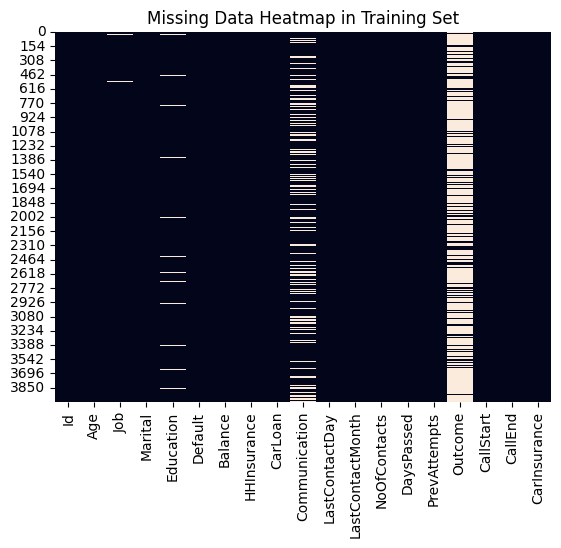

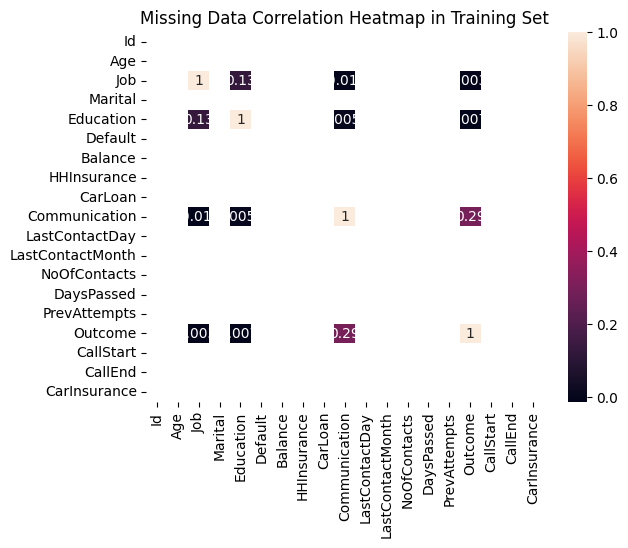

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats

# Visual Inspection
sns.heatmap(df_train.isnull(), cbar=False)
plt.title('Missing Data Heatmap in Training Set')
plt.show()

# Correlation check
missing_correlations = df_train.isnull().corr()
sns.heatmap(missing_correlations, annot=True)
plt.title('Missing Data Correlation Heatmap in Training Set')
plt.show()

In [25]:
from datetime import datetime

# Function to clean the data
def clean_data(df):
    # Imputing missing values
    # For 'Job' and 'Education', fill missing values with the mode (most frequent value)
    for column in ['Job', 'Education']:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    # For 'Communication' and 'Outcome', fill missing values with 'unknown' and 'no_previous_contact' respectively
    df['Communication'].fillna('unknown', inplace=True)
    df['Outcome'].fillna('no_previous_contact', inplace=True)

    # Convert 'CallStart' and 'CallEnd' to datetime and calculating call duration
    df['CallStart'] = pd.to_datetime(df['CallStart'], format='%H:%M:%S')
    df['CallEnd'] = pd.to_datetime(df['CallEnd'], format='%H:%M:%S')
    df['CallDuration'] = (df['CallEnd'] - df['CallStart']).dt.seconds

    # Dropping original 'CallStart' and 'CallEnd' as they are no longer needed
    df.drop(['CallStart', 'CallEnd'], axis=1, inplace=True)

    return df

# Cleaning the training and test datasets
train_data_cleaned = clean_data(df_train.copy())
test_data_cleaned = clean_data(df_test.copy())

# Displaying the first few rows of the cleaned training data to verify changes
train_data_cleaned.head()



,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,CallDuration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,no_previous_contact,0,70
1,2,32,blue-collar,married,primary,0,1156,1,0,unknown,26,may,5,-1,0,no_previous_contact,0,185
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1,340
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,no_previous_contact,1,819
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,no_previous_contact,0,192


In [26]:
train_data_cleaned.isnull().sum()
test_data_cleaned.isnull().sum()


Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome                0
CarInsurance        1000
CallDuration           0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Function to perform one-hot encoding on categorical variables
def encode_categorical_variables(df, categorical_columns):
    # Applying one-hot encoding to the categorical columns
    df = pd.get_dummies(df, columns=categorical_columns)
    return df

# List of categorical columns to encode
categorical_columns = ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']

# Encoding categorical variables for both training and test datasets
train_data_encoded = encode_categorical_variables(train_data_cleaned, categorical_columns)
test_data_encoded = encode_categorical_variables(test_data_cleaned, categorical_columns)

# Ensuring both datasets have the same dummy variables
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1, fill_value=0)

# Separating features and target variable for the training data
X = train_data_encoded.drop('CarInsurance', axis=1)
y = train_data_encoded['CarInsurance']

# Splitting the training data into train and validation sets (80% train, 20% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((3200, 47), (800, 47), (3200,), (800,))

In [28]:
train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Id                           4000 non-null   int64
 1   Age                          4000 non-null   int64
 2   Default                      4000 non-null   int64
 3   Balance                      4000 non-null   int64
 4   HHInsurance                  4000 non-null   int64
 5   CarLoan                      4000 non-null   int64
 6   LastContactDay               4000 non-null   int64
 7   NoOfContacts                 4000 non-null   int64
 8   DaysPassed                   4000 non-null   int64
 9   PrevAttempts                 4000 non-null   int64
 10  CarInsurance                 4000 non-null   int64
 11  CallDuration                 4000 non-null   int32
 12  Job_admin.                   4000 non-null   bool 
 13  Job_blue-collar              4000 non-null   boo

RANDOM FOREST MODEL

Random Forest Classifier Evaluation

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       484
           1       0.81      0.80      0.80       316

    accuracy                           0.85       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.85      0.85      0.85       800

Confusion Matrix:


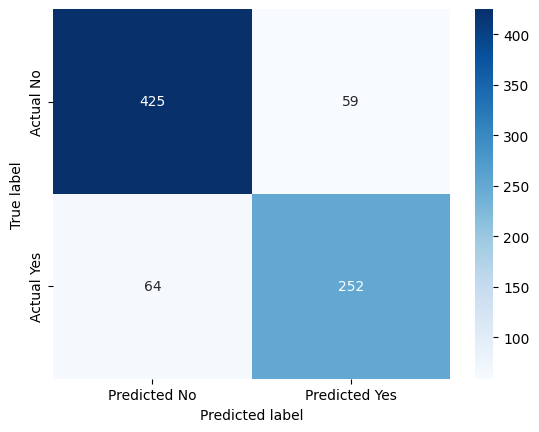

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
rf_predictions = rf_classifier.predict(X_validation)

# Evaluate the Random Forest Classifier
rf_accuracy = accuracy_score(y_validation, rf_predictions)
rf_class_report = classification_report(y_validation, rf_predictions)
rf_conf_matrix = confusion_matrix(y_validation, rf_predictions)

# Print the evaluation results
print("Random Forest Classifier Evaluation\n")
print(f"Accuracy: {rf_accuracy:.2f}\n")
print("Classification Report:")
print(rf_class_report)
print("Confusion Matrix:")

# Plot the confusion matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Feature Important analysis

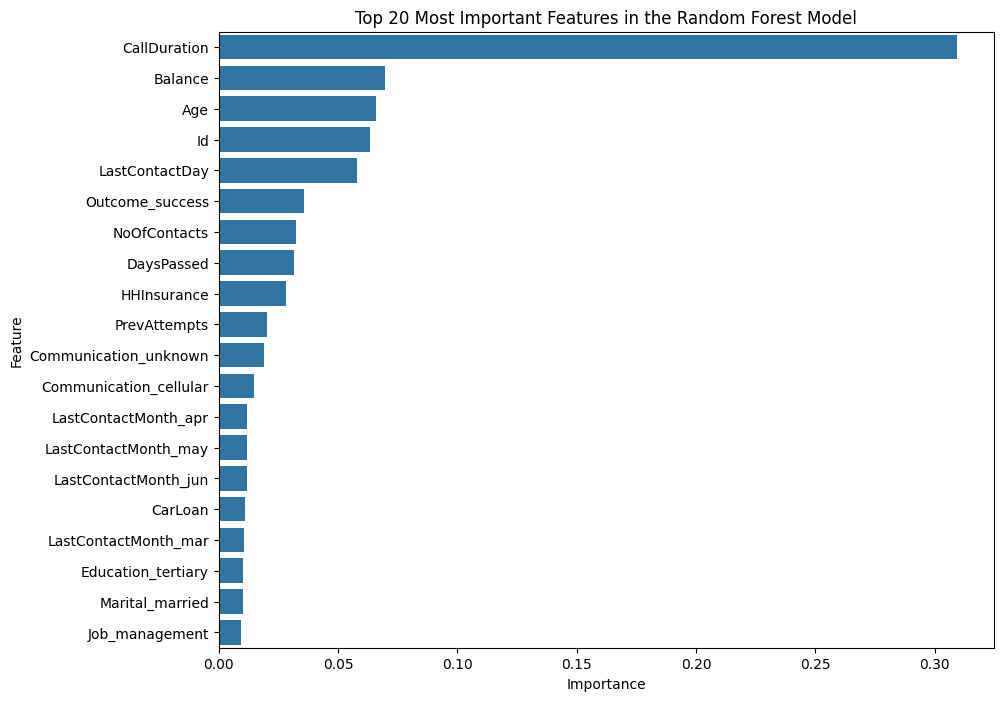

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features.head(20))
plt.title('Top 20 Most Important Features in the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Model Evaluation and Validation

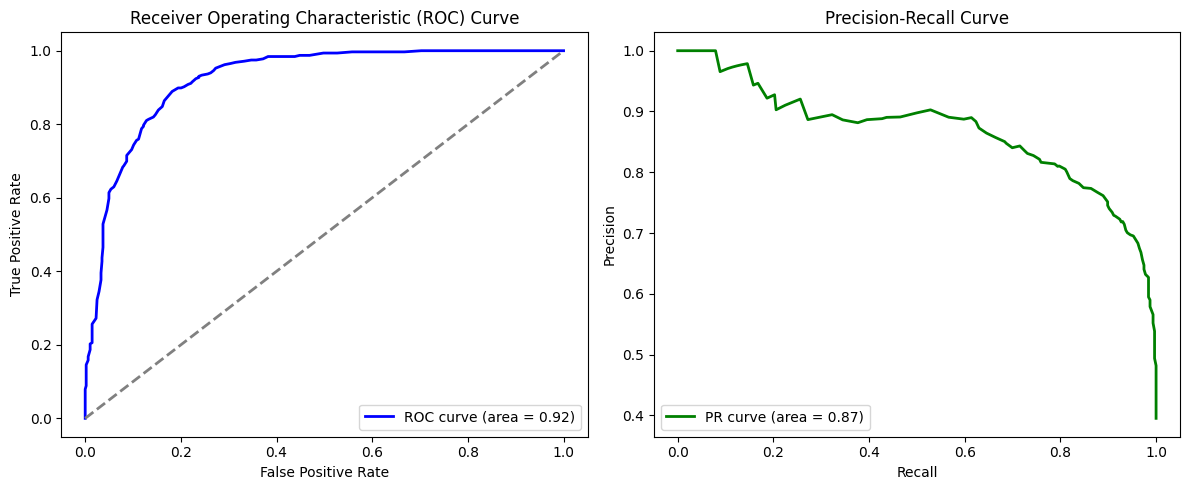

(0.841, 0.008192984804086973)

In [31]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

# Calculate probabilities for the ROC curve
y_scores = rf_classifier.predict_proba(X_validation)[:, 1]

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_validation, y_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_validation, y_scores)
pr_auc = average_precision_score(y_validation, y_scores)

# Plotting ROC Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plotting Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Cross-Validation Scores
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


In [32]:
# Repredicting using the Random Forest model
rf_predictions_validation = rf_classifier.predict(X_validation)

# Create a DataFrame for validation data, true labels, and predicted labels
validation_data = X_validation.copy()
validation_data['TrueLabel'] = y_validation
validation_data['PredictedLabel'] = rf_predictions_validation

# Identify misclassified examples
misclassified = validation_data[validation_data['TrueLabel'] != validation_data['PredictedLabel']]

# Separate false positives and false negatives
false_positives = misclassified[misclassified['PredictedLabel'] == 1]
false_negatives = misclassified[misclassified['PredictedLabel'] == 0]

# Display a few examples of false positives and false negatives
fp_sample = false_positives.sample(min(5, len(false_positives)), random_state=42)
fn_sample = false_negatives.sample(min(5, len(false_negatives)), random_state=42)

fp_sample, fn_sample


(        Id  Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
 196    197   45        0     1447            1        1               7   
 889    890   45        0     3493            1        0               8   
 816    817   46        0      699            0        0               2   
 99     100   19        0      103            0        0              18   
 2093  2094   28        0        0            1        0              12   
 
       NoOfContacts  DaysPassed  PrevAttempts  ...  LastContactMonth_may  \
 196              2          -1             0  ...                 False   
 889              1          -1             0  ...                 False   
 816              1          -1             0  ...                 False   
 99               2          95             4  ...                 False   
 2093             1          79             3  ...                 False   
 
       LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
 196     

In [33]:
# Summary statistics for false positives
fp_summary = false_positives.describe()

# Summary statistics for false negatives
fn_summary = false_negatives.describe()

# Summary statistics for correctly classified instances
correctly_classified = validation_data[validation_data['TrueLabel'] == validation_data['PredictedLabel']]
cc_summary = correctly_classified.describe()

fp_summary, fn_summary, cc_summary

(                Id        Age    Default       Balance  HHInsurance  \
 count    59.000000  59.000000  59.000000     59.000000    59.000000   
 mean   1937.237288  41.644068   0.016949   1918.118644     0.474576   
 std    1241.909089  11.777774   0.130189   2752.724231     0.503640   
 min      34.000000  19.000000   0.000000   -117.000000     0.000000   
 25%     853.500000  33.000000   0.000000    200.500000     0.000000   
 50%    1989.000000  40.000000   0.000000    711.000000     0.000000   
 75%    2970.500000  46.000000   0.000000   2503.000000     1.000000   
 max    3880.000000  82.000000   1.000000  11303.000000     1.000000   
 
          CarLoan  LastContactDay  NoOfContacts  DaysPassed  PrevAttempts  \
 count  59.000000       59.000000     59.000000   59.000000     59.000000   
 mean    0.067797       15.932203      1.881356   52.254237      0.796610   
 std     0.253555        8.749117      1.661789  103.124396      1.435746   
 min     0.000000        1.000000      1.0

In [35]:
pip install xgboost catboost


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


XGBoost Classifier Evaluation

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       484
           1       0.80      0.83      0.81       316

    accuracy                           0.85       800
   macro avg       0.84      0.85      0.84       800
weighted avg       0.85      0.85      0.85       800

Confusion Matrix:


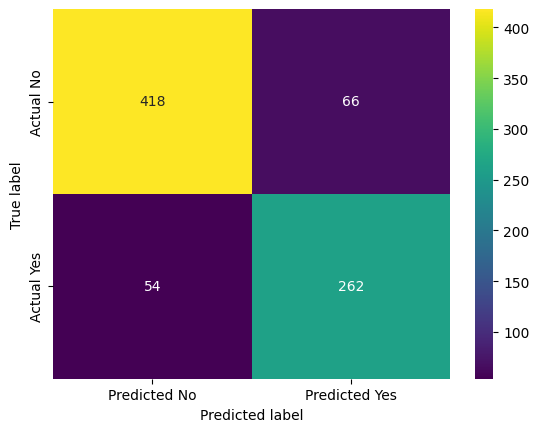

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier()

# Assuming X_train and y_train are defined and contain your training data
# Train the XGBoost Classifier
xgb_model.fit(X_train, y_train)

# Predict on the validation set using the XGBoost model
xgb_predictions = xgb_model.predict(X_validation)

# Evaluate the XGBoost Classifier
xgb_accuracy = accuracy_score(y_validation, xgb_predictions)
xgb_class_report = classification_report(y_validation, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_validation, xgb_predictions)

# Print the evaluation results
print("XGBoost Classifier Evaluation\n")
print(f"Accuracy: {xgb_accuracy:.2f}\n")
print("Classification Report:")
print(xgb_class_report)
print("Confusion Matrix:")

# Plot the confusion matrix
sns.heatmap(xgb_conf_matrix, annot=True, fmt='g', cmap='viridis', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [37]:
# Save Model for deployment
xgb_model.save_model('xgb_model.json')


BAYESIAN HYPERPARAMETER OPTIMIZATION SEARCH

In [38]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

# Define the space over which to search
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7, 8, 9]),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1), # The minimum sum of instance weight (hessian) needed in a child,
    'gamma': hp.uniform('gamma', 0, 0.5), # The minimum loss reduction required to make a further partition on a leaf node
    'subsample': hp.uniform('subsample', 0.6, 1), # The fraction of samples to be used for each tree, sampled from a continuous uniform distribution between 0.6 and 1
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1), # The fraction of features to be used for each tree, sampled from a continuous uniform distribution between 0.6 and 1
}



# Defining the objective function
def objective(space):
    model = XGBClassifier(
        n_estimators=int(space['n_estimators']),
        learning_rate=space['learning_rate'],
        max_depth=int(space['max_depth']),
        min_child_weight=space['min_child_weight'],
        gamma=space['gamma'],
        subsample=space['subsample'],
        colsample_bytree=space['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_validation)
    f1 = f1_score(y_validation, predictions, average='binary')
    return {'loss': -f1, 'status': STATUS_OK}



trials = Trials()  # Creating an instance of the Trials class to store the history of the optimization process

best = fmin(  # Using the fmin function to minimize the objective function
    fn=objective,  # The objective function to be minimized
    space=space,  # The hyperparameter search space defined earlier
    algo=tpe.suggest,  # The algorithm to use for optimization; in this case, the Tree-structured Parzen Estimator (TPE) algorithm
    max_evals=100,  # The maximum number of evaluations (iterations) to perform during the optimization process
    trials=trials  # The Trials object to store details of each evaluation
)

print("Best: ", best)

100%|██████████| 100/100 [01:08<00:00,  1.45trial/s, best loss: -0.8299531981279251]
Best:  {'colsample_bytree': 0.999616811266124, 'gamma': 0.45857383773388344, 'learning_rate': 0.011335395482921107, 'max_depth': 2, 'min_child_weight': 2.0, 'n_estimators': 1000.0, 'subsample': 0.903959074053029}


UPDATING THE MODEL BY ADDING OPTIMMIZED PARAMETERS

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       484
           1       0.82      0.74      0.78       316

    accuracy                           0.84       800
   macro avg       0.83      0.82      0.83       800
weighted avg       0.84      0.84      0.83       800

Accuracy: 0.83625


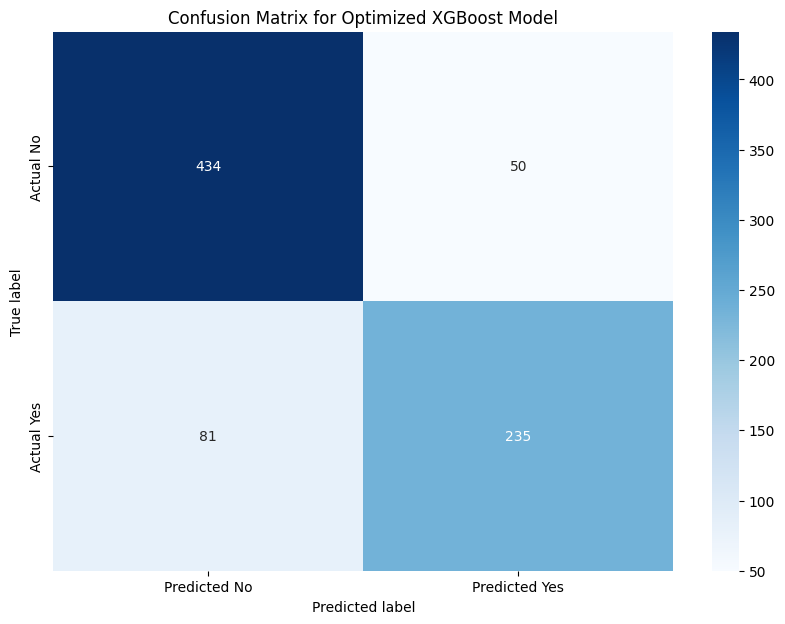

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Use the best hyperparameters found by the Bayesian optimization
optimal_params = {
    'colsample_bytree': 0.7957875375761322,
    'gamma': 0.14052609438461036,
    'learning_rate': 0.20755421589668285,
    'max_depth': int(1),  
    'min_child_weight': 3.0,
    'n_estimators': int(150.0),  
    'subsample': 0.9054282986099855,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

# Initialize the XGBClassifier with the optimal parameters
optimal_xgb_model = XGBClassifier(**optimal_params)

# Fit the model to the training data
optimal_xgb_model.fit(X_train, y_train)

# Predict on the validation set
optimal_predictions = optimal_xgb_model.predict(X_validation)

# Evaluate the model's performance
print(classification_report(y_validation, optimal_predictions))
print("Accuracy:", accuracy_score(y_validation, optimal_predictions))


optimal_conf_matrix = confusion_matrix(y_validation, optimal_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(optimal_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Optimized XGBoost Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The new 'optimized xgboost' model gave a lower accuracy in comparision to the defualt model this one having an 83.625% acccuracy and the other having 85%

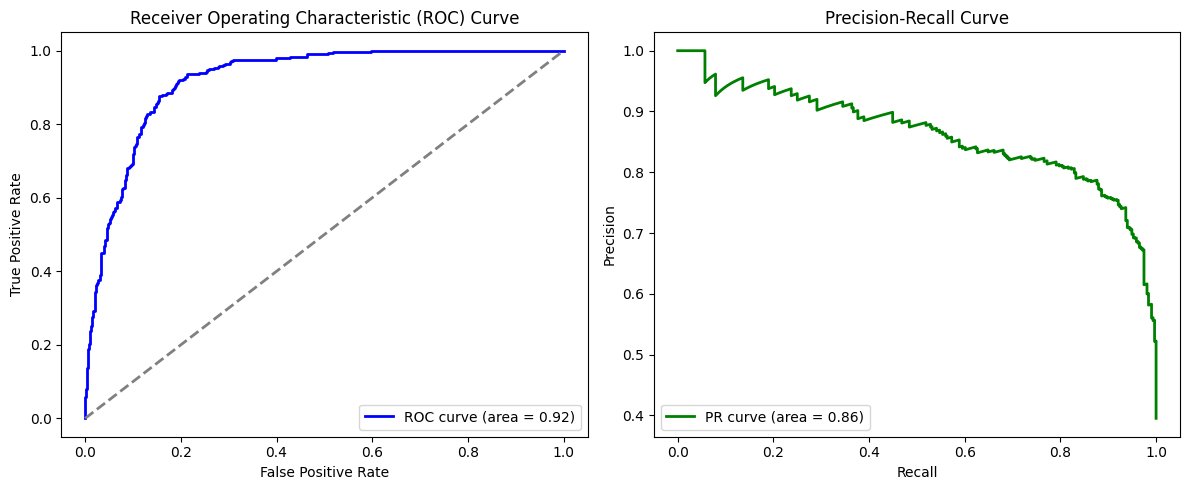

Cross-Validation Mean Accuracy: 0.83
Cross-Validation Accuracy Std Dev: 0.02


In [40]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# Calculate probabilities for the ROC curve
y_scores = xgb_model.predict_proba(X_validation)[:, 1]

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_validation, y_scores)
roc_auc = roc_auc_score(y_validation, y_scores)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_validation, y_scores)
pr_auc = average_precision_score(y_validation, y_scores)

# Plotting ROC Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plotting Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Cross-Validation Scores for XGBoost Model
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f'Cross-Validation Mean Accuracy: {cv_mean:.2f}')
print(f'Cross-Validation Accuracy Std Dev: {cv_std:.2f}')


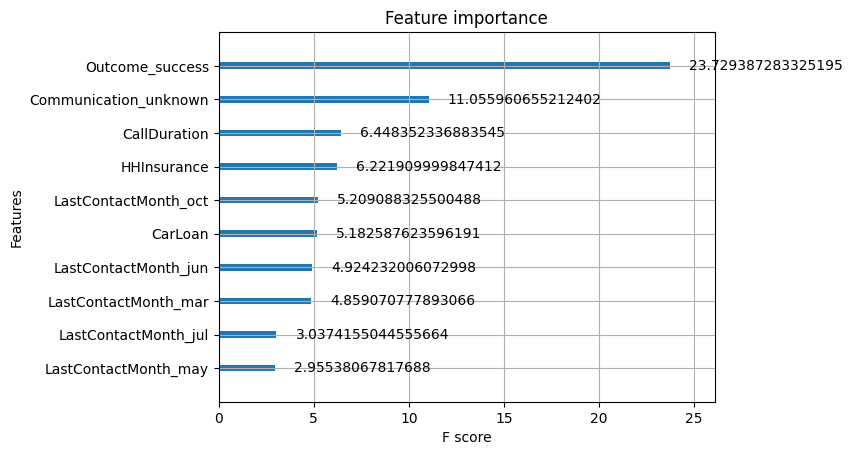

In [41]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.show()


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[16:45:47] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


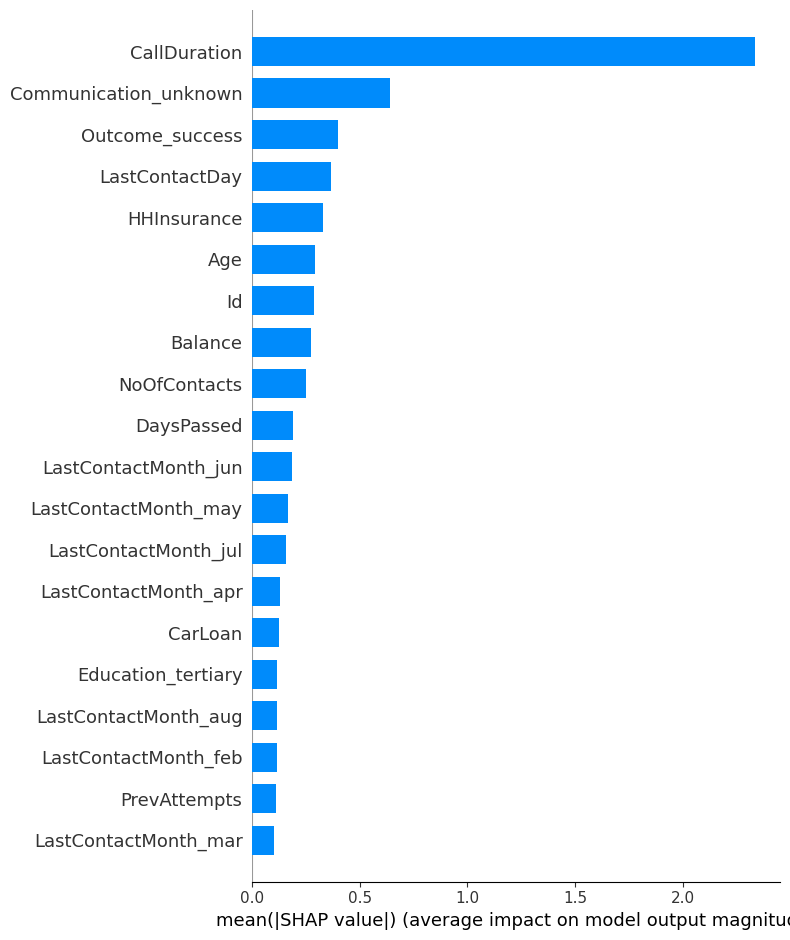

In [42]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_validation)

# Plot summary plot using SHAP values
shap.summary_plot(shap_values, X_validation, plot_type="bar")


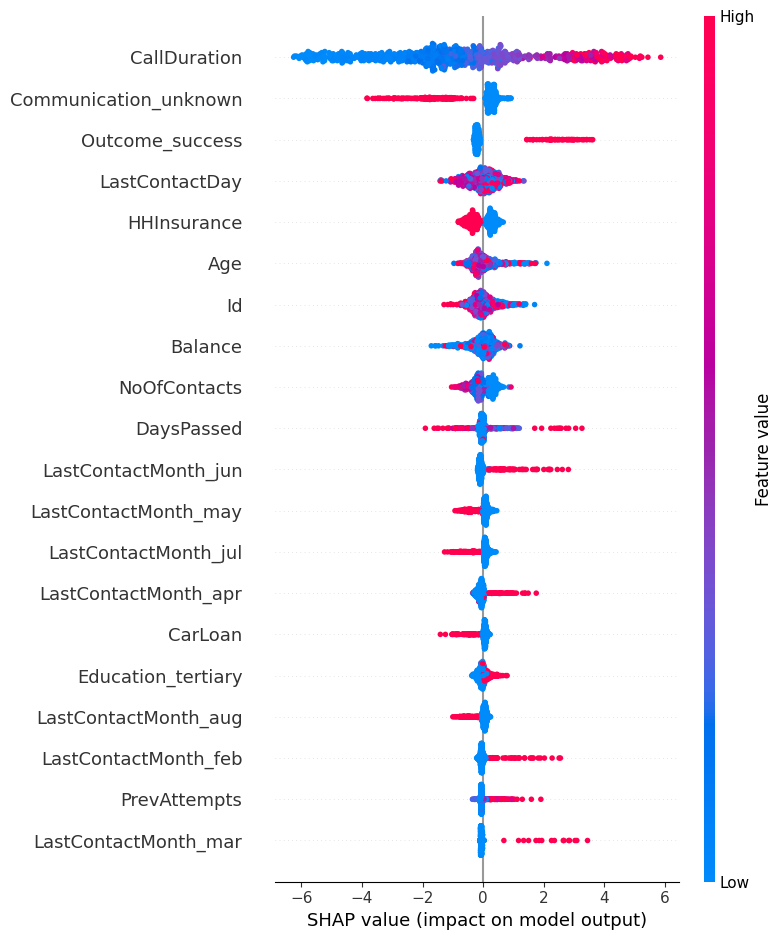

In [43]:
shap.summary_plot(shap_values, X_validation)


PREDICTING ON TEST DATA USING XGB MODEL

In [45]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X_test = test_data_encoded[X_train.columns] 


if 'CarInsurance' in X_test.columns:
    X_test.drop('CarInsurance', axis=1, inplace=True)


y_test = test_data_encoded['CarInsurance']  # The target variable

# Make predictions on the test set using the trained model
y_pred_xgb = xgb_model.predict(X_test)

y_pred_xgb

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,

PREDICTING ON TEST DATA USING RANDOM FOREST MODEL

In [46]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




X_test = test_data_encoded[X_train.columns]  


if 'CarInsurance' in X_test.columns:
    X_test.drop('CarInsurance', axis=1, inplace=True)


y_test = test_data_encoded['CarInsurance']  # The target variable

# Make predictions on the test set using the trained model
y_pred_rf = rf_classifier.predict(X_test)

y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,

DATAFRAME COMPARING RESULTS OF XGBMODEL AND RANDOMFOREST

In [47]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'RF_Predictions': y_pred_rf,
    'XGB_Predictions': y_pred_xgb
})

# Add a column to check where predictions match
comparison_df['Predictions_Match'] = comparison_df['RF_Predictions'] == comparison_df['XGB_Predictions']

# Analyze the matches and mismatches
matches = comparison_df[comparison_df['Predictions_Match'] == True]
mismatches = comparison_df[comparison_df['Predictions_Match'] == False]

# Get insights into the matches and mismatches
print(f"Total predictions: {comparison_df.shape[0]}")
print(f"Matching predictions: {matches.shape[0]}")
print(f"Mismatching predictions: {mismatches.shape[0]}")

#Save the comparison to a CSV for further analysis
comparison_df.to_csv('model_predictions_comparison.csv', index=False)

Total predictions: 1000
Matching predictions: 896
Mismatching predictions: 104


MOVING ON TO NUERAL NETWORKS

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

# Define the model
standard_model = Sequential()
standard_model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
standard_model.add(Dropout(0.2))
standard_model.add(Dense(64, activation='relu'))
standard_model.add(Dropout(0.2))
standard_model.add(Dense(1, activation='sigmoid'))  


# Compile the model
standard_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history = standard_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_validation_scaled, y_validation))


2024-03-21 16:46:13.210427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)


In [50]:
# Define the model
standard_model = Sequential()
standard_model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
standard_model.add(Dropout(0.2))
standard_model.add(Dense(64, activation='relu'))
standard_model.add(Dropout(0.2))
standard_model.add(Dense(1, activation='sigmoid'))  


# Compile the model
standard_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [51]:
history = standard_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_validation_scaled, y_validation))


Epoch 1/50


100/100 [==============================] - 1s 3ms/step - loss: 0.5383 - accuracy: 0.7138 - val_loss: 0.4148 - val_accuracy: 0.8087
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8012 - val_loss: 0.3795 - val_accuracy: 0.8313
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8266 - val_loss: 0.3678 - val_accuracy: 0.8250
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8456 - val_loss: 0.3616 - val_accuracy: 0.8350
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8462 - val_loss: 0.3540 - val_accuracy: 0.8288
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8584 - val_loss: 0.3590 - val_accuracy: 0.8325
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8594 - val_loss: 0.3600 - val_accuracy: 0.8425
Epoch 8/50
100/10

In [52]:
# Evaluate the model on validation set
val_loss, val_accuracy = standard_model.evaluate(X_validation_scaled, y_validation)
print(f"Validation Accuracy: {val_accuracy:.2f}, Validation Loss: {val_loss:.2f}")


 1/25 [>.............................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

25/25 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.8238
Validation Accuracy: 0.82, Validation Loss: 0.56


USING KERAS TUNER TO FIND OPTIMAL HYPERPARAMETERS

In [53]:
from keras.models import Sequential  # Importing the Sequential model from Keras
from keras.layers import Dense, Dropout  # Importing Dense and Dropout layers from Keras
from keras.optimizers import Adam  # Importing the Adam optimizer from Keras

def build_model(hp):  # Defining the build_model function which takes hyperparameters (hp) as input
    model = Sequential()  # Initializing a Sequential model
    # Adding the input layer with a variable number of units (determined by hyperparameters), using ReLU activation
    model.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(0.2))  # Adding a Dropout layer with a dropout rate of 0.2 to prevent overfitting
    for i in range(hp.Int('n_layers', 1, 3)):  # Adding a loop to create a variable number of hidden layers (1 to 3)
        # Adding a hidden layer with a variable number of units (determined by hyperparameters), using ReLU activation
        model.add(Dense(hp.Int(f'layer_{i}_units', min_value=32, max_value=256, step=32), activation='relu'))
        model.add(Dropout(0.2))  # Adding a Dropout layer with a dropout rate of 0.2 to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Adding the output layer with a single unit and sigmoid activation for binary classification
    # Compiling the model with the Adam optimizer (with a variable learning rate), binary crossentropy loss, and accuracy metric
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model  # Returning the compiled model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_tuner_demo'
)

tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_validation_scaled, y_validation))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


Reloading Tuner from my_dir/keras_tuner_demo/tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.001.



NEW MODEL WITH OPTIMIZED HYPERPARAMETERS

In [54]:
# Define the optimized model
opt_model = Sequential()
opt_model.add(Dense(224, activation='relu', input_shape=(X_train_scaled.shape[1],)))
opt_model.add(Dropout(0.2))
opt_model.add(Dense(64, activation='relu'))
opt_model.add(Dropout(0.2))
opt_model.add(Dense(1, activation='sigmoid'))

# Compile the model with the optimal learning rate
opt_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])

# Train the model with the full training set
history = opt_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                    validation_data=(X_validation_scaled, y_validation))

# Evaluate the optimized model
val_loss, val_accuracy = opt_model.evaluate(X_validation_scaled, y_validation)
print(f"Validation Accuracy: {val_accuracy:.2f}, Validation Loss: {val_loss:.2f}")


Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.7462 - val_loss: 0.3821 - val_accuracy: 0.8363
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8228 - val_loss: 0.3602 - val_accuracy: 0.8300
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8409 - val_loss: 0.3562 - val_accuracy: 0.8263
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8544 - val_loss: 0.3463 - val_accuracy: 0.8375
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8569 - val_loss: 0.3531 - val_accuracy: 0.8425
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8666 - val_loss: 0.3556 - val_accuracy: 0.8413
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8722 - val_loss: 0.3543 - val_accuracy: 0.8363
Epoch 

In [55]:
pip install pydot


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install utils


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


25/25 [==============================] - 0s 778us/step
Classification Report for Standard Model:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       484
           1       0.77      0.79      0.78       316

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

F1 Score: 0.7793427230046948
Precision: 0.7708978328173375
Recall: 0.7879746835443038
ROC AUC Score: 0.8959553823621718


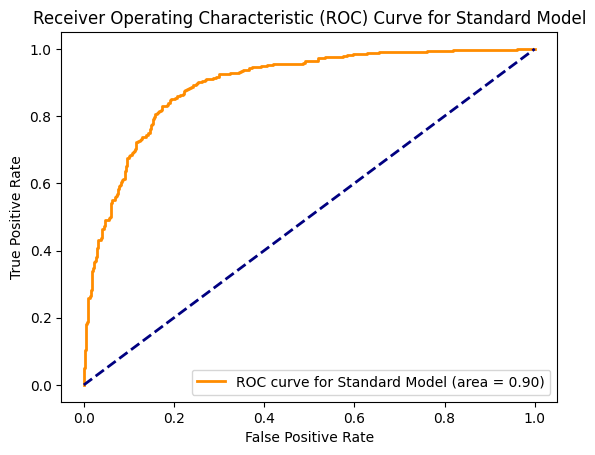

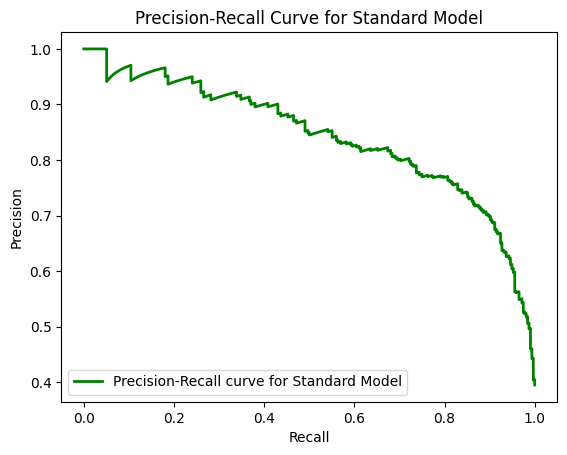

Classification Report for Optimized Model:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       484
           1       0.78      0.79      0.78       316

    accuracy                           0.83       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.83      0.83      0.83       800

F1 Score: 0.7830188679245284
Precision: 0.778125
Recall: 0.7879746835443038
ROC AUC Score: 0.9051646354221153


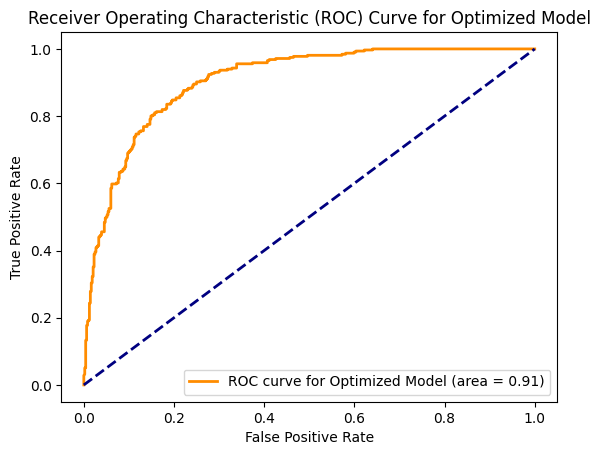

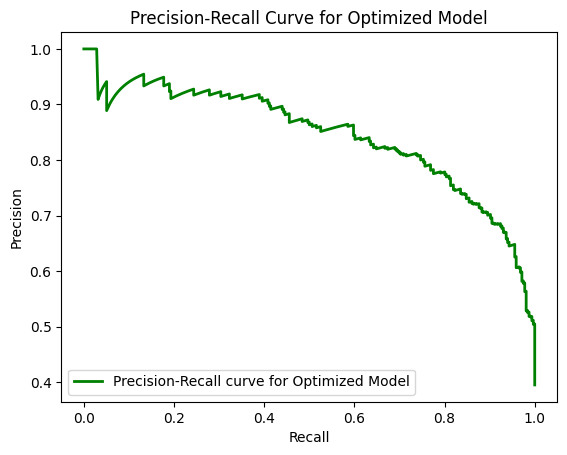

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score


y_pred_standard = standard_model.predict(X_validation_scaled)
y_pred_optimized = opt_model.predict(X_validation_scaled)

# Convert probabilities to binary predictions 
y_pred_binary_standard = (y_pred_standard > 0.5).astype(int)
y_pred_binary_optimized = (y_pred_optimized > 0.5).astype(int)


def evaluate_model(y_true, y_pred_prob, y_pred_binary, model_name):
    # Calculate metrics
    f1 = f1_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred_binary))
    
    # Print individual scores
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC Score: {roc_auc}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve for {model_name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_prob)
    plt.figure()
    plt.plot(recall_vals, precision_vals, color='green', lw=2, label=f'Precision-Recall curve for {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc="lower left")
    plt.show()

# Evaluate standard model
evaluate_model(y_validation, y_pred_standard, y_pred_binary_standard, 'Standard Model')

# Evaluate optimized model
evaluate_model(y_validation, y_pred_optimized, y_pred_binary_optimized, 'Optimized Model')


 1/25 [>.............................] - ETA: 0s

25/25 [==============================] - 0s 1ms/step


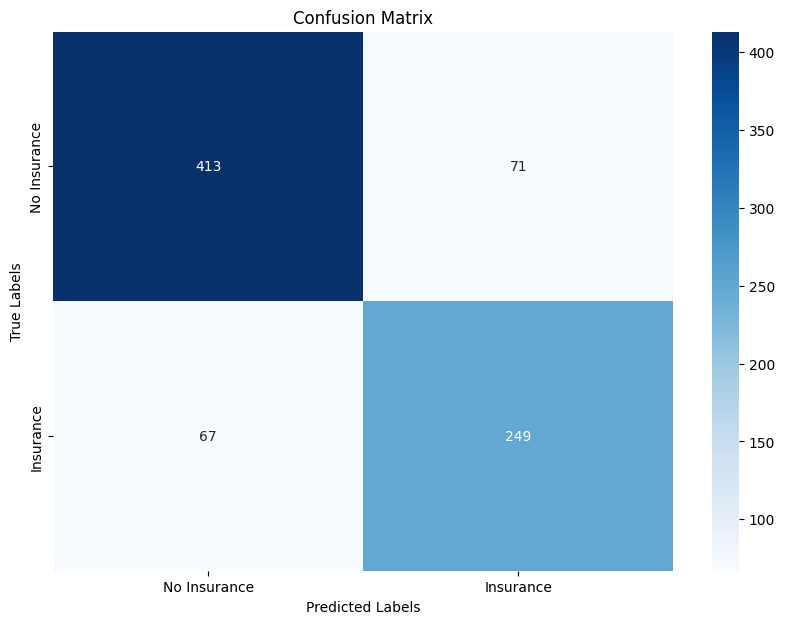

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the optimized model
y_pred = (opt_model.predict(X_validation_scaled) > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)

# Visualize the confusion matrix using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Insurance', 'Insurance'], yticklabels=['No Insurance', 'Insurance'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


 1/25 [>.............................] - ETA: 0s

25/25 [==============================] - 0s 4ms/step


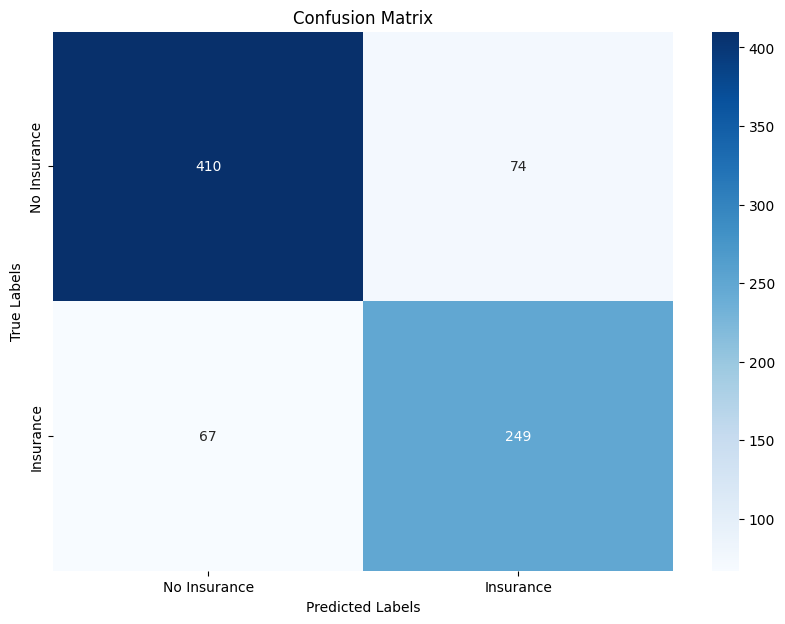

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the standard model
y_pred = (standard_model.predict(X_validation_scaled) > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)

# Visualize the confusion matrix using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Insurance', 'Insurance'], yticklabels=['No Insurance', 'Insurance'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


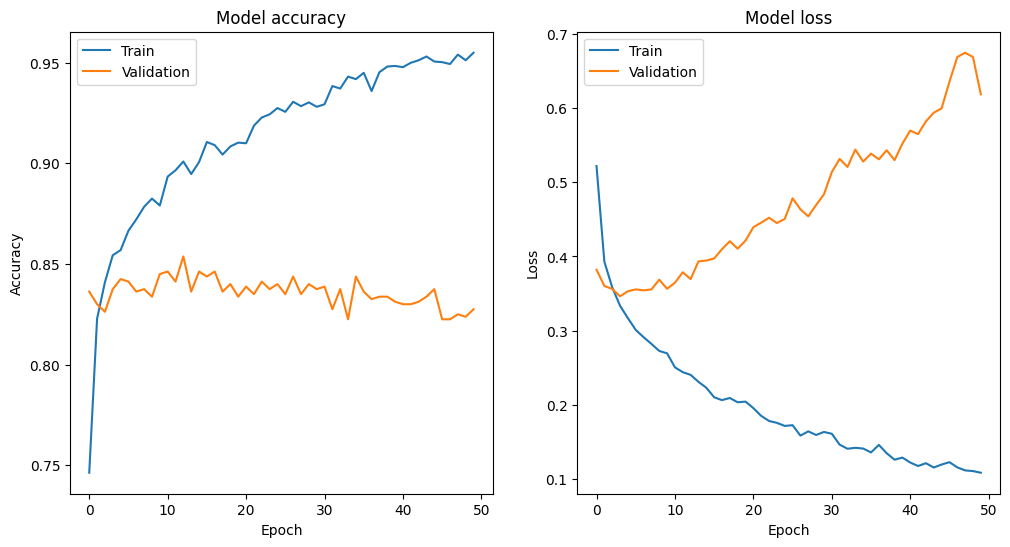

In [60]:
import matplotlib.pyplot as plt



# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [61]:
pip install shap



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


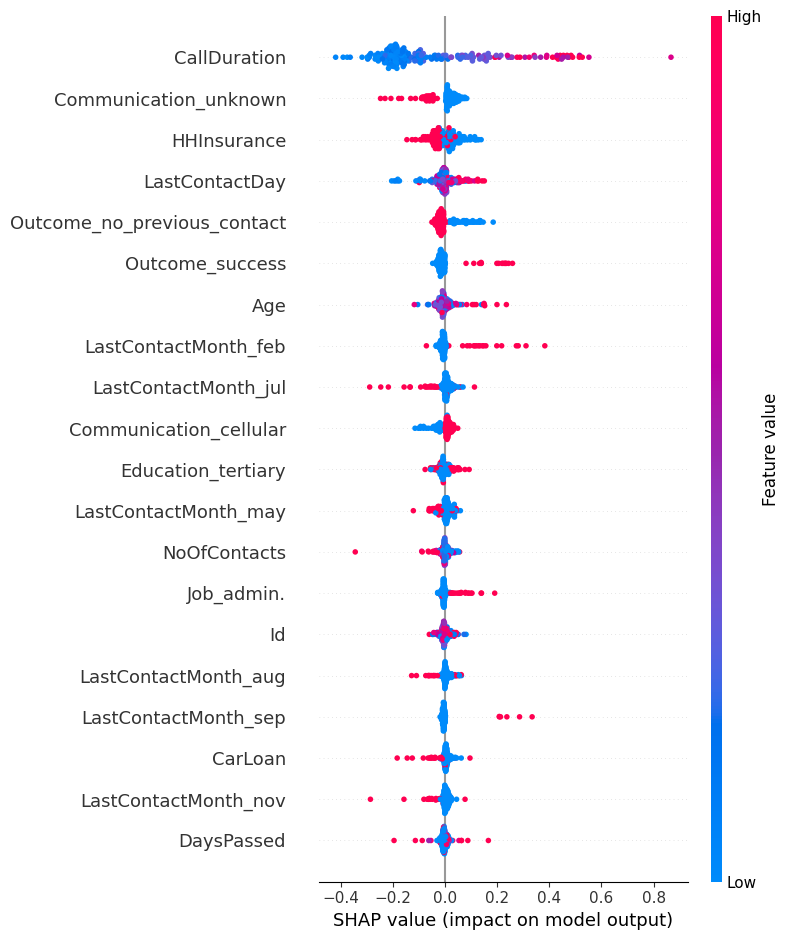

In [62]:
import shap

# Create the explainer object with the model
explainer = shap.DeepExplainer(opt_model, X_train_scaled)

# Calculate SHAP values on a subset of data
X_sample = X_validation_scaled[:200]  
shap_values = explainer.shap_values(X_sample)

# Summary plot
shap.summary_plot(shap_values[0], X_sample, feature_names=X_train.columns)



PREDICTIING ON TEST DATA USING NEURAL NETWORK MODEL AND ADDING TO CSV FILE INCLUDING RF AND XGB PREDICTIONS

In [63]:
# Ensure the test features are in the same order as the training features
X_test = test_data_encoded[X_train.columns]  


if 'CarInsurance' in X_test.columns:
    X_test.drop('CarInsurance', axis=1, inplace=True)


scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)



# Make predictions
predictions = opt_model.predict(X_test_scaled)

#convert probabilities to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

#save the predictions to a CSV file
pd.DataFrame(binary_predictions, columns=['Predicted']).to_csv('predictions.csv', index=False)


32/32 [==============================] - 0s 1ms/step


In [64]:
# Add the neural network predictions to the DataFrame
comparison_df['NN_Predictions'] = binary_predictions

# Update the 'Predictions_Match' to check where all predictions match
comparison_df['All_Predictions_Match'] = (
    (comparison_df['RF_Predictions'] == comparison_df['XGB_Predictions']) &
    (comparison_df['XGB_Predictions'] == comparison_df['NN_Predictions'])
)

# Analyze the matches and mismatches including the neural network predictions
all_matches = comparison_df[comparison_df['All_Predictions_Match'] == True]
all_mismatches = comparison_df[comparison_df['All_Predictions_Match'] == False]

# Get insights into the matches and mismatches
print(f"Total predictions: {comparison_df.shape[0]}")
print(f"All matching predictions: {all_matches.shape[0]}")
print(f"Mismatches (any model differs): {all_mismatches.shape[0]}")

# Save the updated comparison to a CSV for further analysis
comparison_df.to_csv('model_predictions_comparison_with_nn.csv', index=False)


Total predictions: 1000
All matching predictions: 827
Mismatches (any model differs): 173
